In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

import efficient_bennett as eb

In [3]:
# MSE approximation
max_n = 2000
factor_off = 1.02

n_vec = np.arange(50, max_n + 1, 50)
our_space = []
w = 2

for n in n_vec:

    B = eb.bennett_matrix(n)
    target_error = factor_off * eb.get_mse(B, B)
    our_error = 1000 * target_error
    space = None

    while our_error > target_error :

        c = 1 - 1 / w

        L, R, space = eb.approx_bennett_mm(n, c=c, w=w)
        our_error = eb.get_mse(L, R)
        if our_error > target_error:
            w += 1
        print(w, c)

    our_space.append(space)
    print(f'n={n} done w/ space={space}!')

3 0.5
3 0.6666666666666667
n=50 done w/ space=6!
4 0.6666666666666667
4 0.75
n=100 done w/ space=9!
4 0.75
n=150 done w/ space=9!
4 0.75
n=200 done w/ space=9!
4 0.75
n=250 done w/ space=10!
4 0.75
n=300 done w/ space=10!
4 0.75
n=350 done w/ space=10!
4 0.75
n=400 done w/ space=11!
4 0.75
n=450 done w/ space=11!
4 0.75
n=500 done w/ space=11!
4 0.75
n=550 done w/ space=11!
4 0.75
n=600 done w/ space=11!
4 0.75
n=650 done w/ space=11!
4 0.75
n=700 done w/ space=12!
4 0.75
n=750 done w/ space=12!
4 0.75
n=800 done w/ space=12!
4 0.75
n=850 done w/ space=12!
4 0.75
n=900 done w/ space=12!
4 0.75
n=950 done w/ space=12!
4 0.75
n=1000 done w/ space=12!
4 0.75
n=1050 done w/ space=12!
4 0.75
n=1100 done w/ space=12!
4 0.75
n=1150 done w/ space=12!
4 0.75
n=1200 done w/ space=12!
4 0.75
n=1250 done w/ space=12!
5 0.75
5 0.8
n=1300 done w/ space=16!
5 0.8
n=1350 done w/ space=16!
5 0.8
n=1400 done w/ space=16!
5 0.8
n=1450 done w/ space=16!
5 0.8
n=1500 done w/ space=16!
5 0.8
n=1550 done w/ 

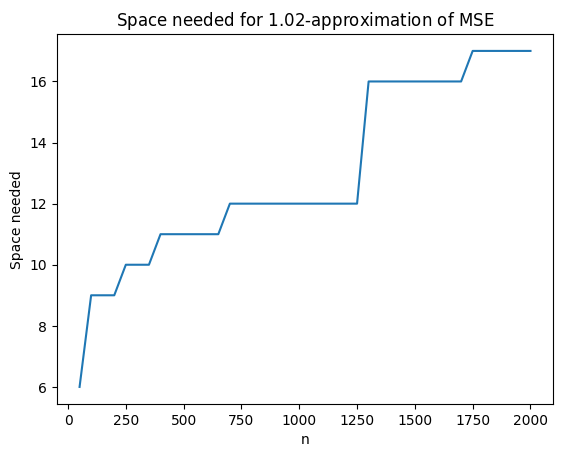

In [4]:
plt.figure()
plt.title(f"Space needed for ${factor_off}$-approximation of MSE")
plt.plot(n_vec, our_space)
plt.xlabel('n')
plt.ylabel('Space needed')
# plt.xscale('log')
plt.show()

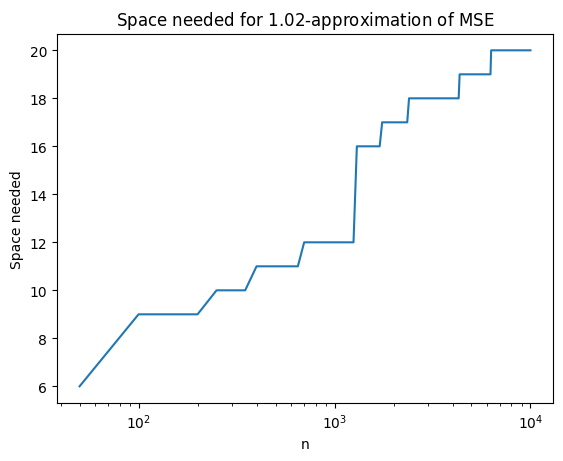

In [4]:
plt.figure()
plt.title(f"Space needed for ${factor_off}$-approximation of MSE")
plt.plot(n_vec, our_space)
plt.xlabel('n')
plt.ylabel('Space needed')
plt.xscale('log')
plt.show()

In [24]:
N = 10000
space_vec = []
approx_vec = []

# MSE approximation
B = eb.bennett_matrix(N)
target_mse = eb.get_mse(B, B)

for w in range(2, 100, 1):

    c = 1 - 1 / w
    L, R, space = eb.approx_bennett_mm(N, c=c, w=w, perform_extra_checks=True)
    our_mse = eb.get_mse(L, R)

    approx_vec.append(our_mse / target_mse)
    space_vec.append(space)

    print(w, space)

2 7
3 12
4 16
5 20
6 23
7 26
8 30
9 34
10 38
11 39
12 43
13 46
14 50
15 51
16 54
17 57
18 61
19 62
20 65
21 68
22 71
23 73
24 76
25 79
26 82
27 84
28 87
29 90
30 93
31 95
32 98
33 100
34 103
35 105
36 108
37 110
38 113
39 115
40 117
41 120
42 123
43 125
44 127
45 130
46 133
47 135
48 137
49 140
50 143
51 145
52 147
53 150
54 153
55 155
56 157
57 160
58 163
59 165
60 167
61 170
62 173
63 175
64 177
65 179
66 182
67 184
68 186
69 188
70 191
71 193
72 195
73 197
74 200
75 202
76 204
77 206
78 209
79 211
80 212
81 215
82 218
83 220
84 221
85 224
86 227
87 229
88 230
89 233
90 236
91 238
92 239
93 242
94 245
95 247
96 248
97 251
98 254
99 256


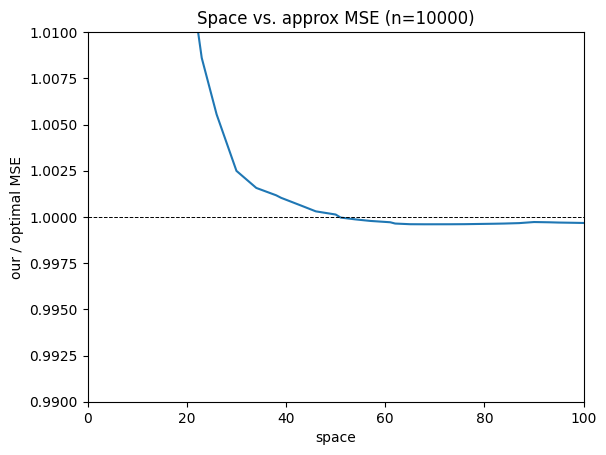

In [27]:
plt.figure()
plt.title(f"Space vs. approx MSE (n={N})")
plt.plot(space_vec, approx_vec)
plt.xlabel('space')
plt.ylabel('our / optimal MSE')
plt.ylim([0.99, 1.01])
plt.xlim([0, 100])
plt.axhline(1.0, ls='--', lw=0.7, color='black')
# plt.yscale('log')
# plt.xscale('log')
plt.show()

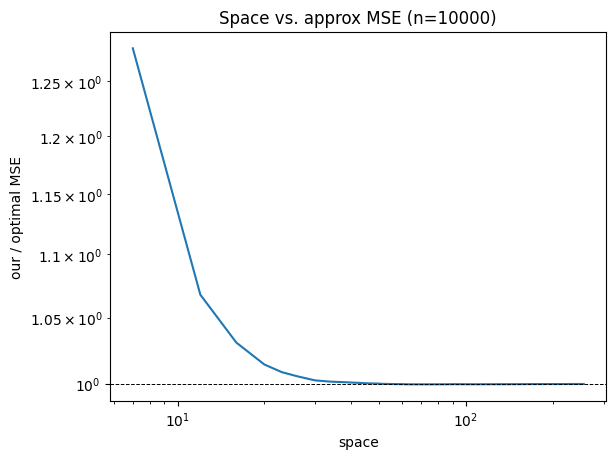

In [28]:
plt.figure()
plt.title(f"Space vs. approx MSE (n={N})")
plt.plot(space_vec, approx_vec)
plt.xlabel('space')
plt.ylabel('our / optimal MSE')
# plt.ylim([0.99, 1.01])
# plt.xlim([0, 100])
plt.axhline(1.0, ls='--', lw=0.7, color='black')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [2]:
N = 10000
space_vec = []
approx_vec = []

# MSE approximation
B = eb.bennett_matrix(N)
opt_error = eb.get_max_rse(B, B)

for w in range(2, 100, 1):

    c = 1 - 1 / w
    L, R, space = eb.approx_bennett_mm(N, c=c, w=w, perform_extra_checks=True)
    our_error = eb.get_max_rse(L, R)

    approx_vec.append(our_error / opt_error)
    space_vec.append(space)

    print(w, space)

2 7
3 12
4 16
5 20
6 23
7 26
8 30
9 34
10 38
11 39
12 43
13 46
14 50
15 51
16 54
17 57
18 61
19 62
20 65
21 68
22 71
23 73
24 76
25 79
26 82
27 84
28 87
29 90
30 93
31 95
32 98
33 100
34 103
35 105
36 108
37 110
38 113
39 115
40 117
41 120
42 123
43 125
44 127
45 130
46 133
47 135
48 137
49 140
50 143
51 145
52 147
53 150
54 153
55 155
56 157
57 160
58 163
59 165
60 167
61 170
62 173
63 175
64 177
65 179
66 182
67 184
68 186
69 188
70 191
71 193
72 195
73 197
74 200
75 202
76 204
77 206
78 209
79 211
80 212
81 215
82 218
83 220
84 221
85 224
86 227
87 229
88 230
89 233
90 236
91 238
92 239
93 242
94 245
95 247
96 248
97 251
98 254
99 256


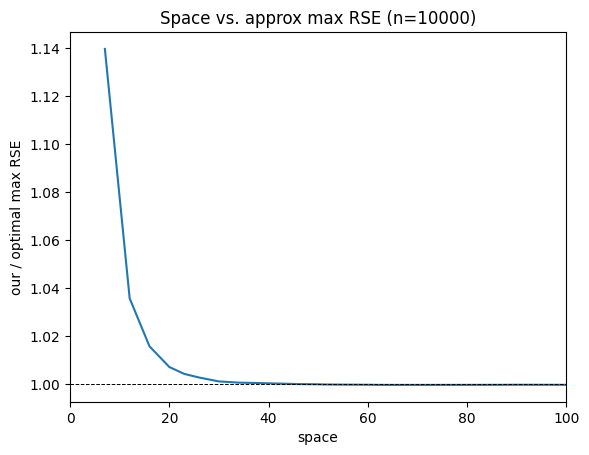

In [3]:

plt.figure()
plt.title(f"Space vs. approx max RSE (n={N})")
plt.plot(space_vec, approx_vec)
plt.xlabel('space')
plt.ylabel('our / optimal max RSE')
# plt.ylim([0.6, 1.01])
plt.xlim([0, 100])
plt.axhline(1.0, ls='--', lw=0.7, color='black')
# plt.yscale('log')
# plt.xscale('log')
plt.show()

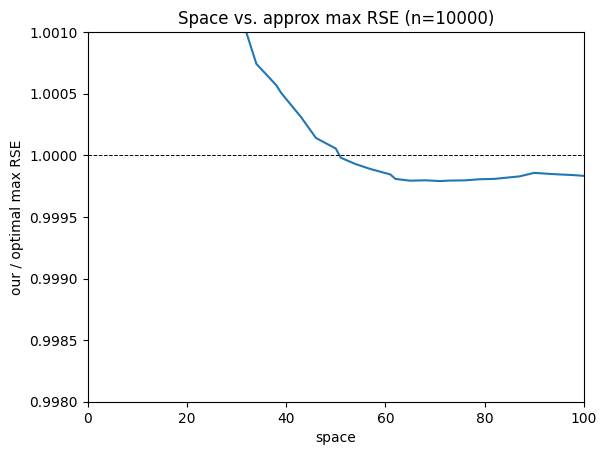

In [7]:

plt.figure()
plt.title(f"Space vs. approx max RSE (n={N})")
plt.plot(space_vec, approx_vec)
plt.xlabel('space')
plt.ylabel('our / optimal max RSE')
plt.ylim([0.998, 1.001])
plt.xlim([0, 100])
plt.axhline(1.0, ls='--', lw=0.7, color='black')
# plt.yscale('log')
# plt.xscale('log')
plt.show()